# In-Class Activity: Linear Motion

In this activity, we'll be using sensory data you collect on your phone with either PhyPhox or Physics Toolbox. With the linear accelerometer, we'll measure the motion of our phone, and then use it to calculate the displacement (distance) of an object.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import the csv file as a data frame

# NOTE: You can either use the data file you downloaded from Canvas
# Or, after Prof. W-B uploads the demo file, you can download
# that from Google Drive
# OR even better...use your own data file!
df=pd.read_csv('door.csv')

<Axes: >

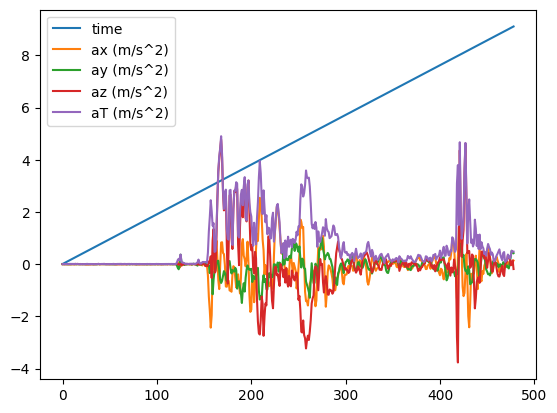

In [4]:
# YOUR CODE HERE
df.plot()

In [5]:
# Examine the data frame -- how many rows and columns?
# What does each column contain?

# Use .describe to examine the columns


In [6]:
# YOUR CODE HERE
df.describe()

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
count,479.000000,479.000000,479.000000,479.000000,479.000000
mean,4.556505,-0.062466,-0.077300,0.017506,0.744284
std,2.634323,0.590680,0.329164,1.034900,0.991648
min,0.007860,-2.430900,-1.486100,-3.765300,0.000000
25%,2.281886,-0.198500,-0.189850,-0.181650,0.009500
50%,4.555869,-0.002100,-0.002000,-0.000200,0.330000
75%,6.830539,0.054000,0.032500,0.074550,1.062500
max,9.104432,2.542000,1.001300,4.776900,4.901000


In [7]:
# Let's make some plots of the data

In [8]:
# Let's make some plots of the data

# We can use .plot to show all of the columns

# What is happening with each one?

<Axes: >

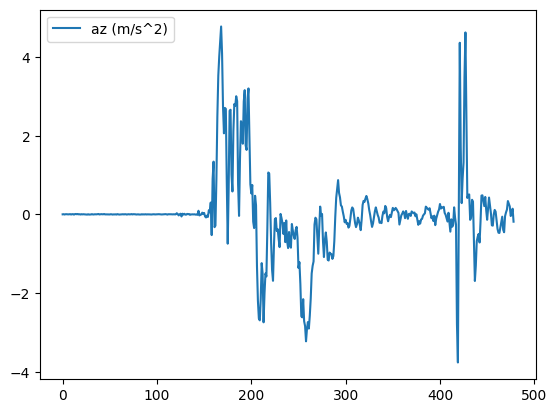

In [9]:
df.plot(y='az (m/s^2)')

<Axes: >

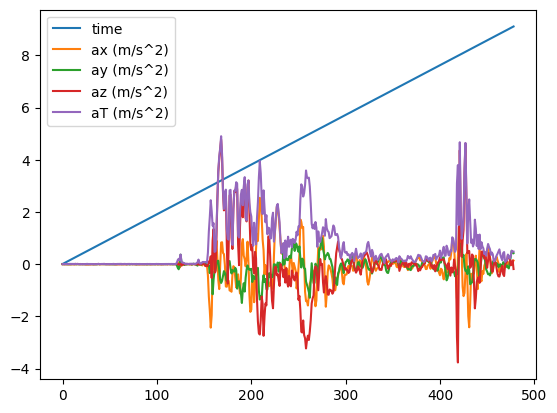

In [10]:
# YOUR CODE HERE
df.plot()

In [11]:
# Or we can look at individual columns...
# First let's look at the z acceleration

In [12]:
# YOUR CODE HERE


In [13]:
# How many points of data before it starts to move?

In [14]:
# Notice how it *seems* to start to 0... but it's a good practice to calibrate our sensor
# We can do this by calculating the baseline and subtracting it out

# First we calculate the z baseline by averaging the first 100 rows of data
# Remember how to select rows? We use .iloc

In [15]:
# YOUR CODE HERE
z_baseline=df['az (m/s^2)'].iloc[:80].mean()
z_baseline

0.0011362499999999999

In [16]:
# Now let's make a new column where we substract out the baseline

In [17]:
# YOUR CODE HERE
df["accel_z"]=df['az (m/s^2)']-z_baseline
df

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),accel_z
0,0.007860,0.0021,0.0038,0.0010,0.004,-0.000136
1,0.028047,-0.0003,-0.0011,0.0045,0.005,0.003364
2,0.045715,-0.0028,0.0025,-0.0035,0.005,-0.004636
3,0.065247,-0.0042,0.0000,0.0035,0.005,0.002364
4,0.083643,-0.0039,-0.0012,0.0045,0.006,0.003364
...,...,...,...,...,...,...
474,9.028349,0.0743,0.0436,0.2014,0.219,0.200264
475,9.047918,0.0389,0.2888,-0.0419,0.294,-0.043036
476,9.071050,-0.0374,0.5128,0.0074,0.514,0.006264
477,9.085785,0.0982,0.4556,0.1442,0.488,0.143064


In [18]:
# We are going to do numerical integration (remember physics?) to figure out

# a) the velocity
# b) the linear displacement

# To do that, we need to know the time interval of each row, dt (change in time between each row)

In [19]:
# How do we figure out the time interval (dt)?

In [20]:
# First, figure out the LAST time stamp in our data set
df["time"].iloc[-1]

9.104432

In [21]:
# YOUR CODE HERE
df.cumsum()

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),accel_z
0,0.007860,0.0021,0.0038,0.0010,0.004,-0.000136
1,0.035907,0.0018,0.0027,0.0055,0.009,0.003227
2,0.081622,-0.0010,0.0052,0.0020,0.014,-0.001409
3,0.146869,-0.0052,0.0052,0.0055,0.019,0.000955
4,0.230512,-0.0091,0.0040,0.0100,0.025,0.004319
...,...,...,...,...,...,...
474,2146.256758,-30.1575,-38.7068,8.4617,354.734,7.921981
475,2155.304676,-30.1186,-38.4180,8.4198,355.028,7.878945
476,2164.375726,-30.1560,-37.9052,8.4272,355.542,7.885209
477,2173.461511,-30.0578,-37.4496,8.5714,356.030,8.028272


In [22]:
# Then, we can divide that last time step (elapsed time) by the number of rows 
# This tells us how big each time step is
# We are going to use .shape, which tell us the size of a data frame or a series
# df.shape[0] will tell us how many rows 

In [23]:
# Calculate dt
#last time/ number of rows
# YOUR CODE HERE
dt=df["time"].iloc[-1]/df.shape[0]
dt

0.019007164926931105

In [24]:
# Now onto numeric intergration

# We'll use .cumsum(), which tells us the cumulative sum of a column
# https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html

In [25]:
# First, let's calculate the velocity for the z column
# We'll add a new z velocity column, numerically integrating the z acceleration
# We do this by multiplying the .cumsum of the z acceleration by the timestep, dt

# YOUR CODE HERE
df["z_velocity_ms"]=df["accel_z"].cumsum() *dt
df["z_velocity_ms"]

0     -0.000003
1      0.000061
2     -0.000027
3      0.000018
4      0.000082
         ...   
474    0.150574
475    0.149756
476    0.149875
477    0.152595
478    0.149042
Name: z_velocity_ms, Length: 479, dtype: float64

In [26]:
# And let's plot it

# YOUR CODE HERE

In [27]:
# Finally, we can numerically integrate *again* to find the position!
# Let's make a new column for the z position
# Again, we multiply .cumsum times the timestep, dt

# z position:

# YOUR CODE HERE
df['z_position_m']=df["z_velocity_ms"].cumsum() *dt
df['z_position_m']

0     -4.922335e-08
1      1.116783e-06
2      6.078407e-07
3      9.528557e-07
4      2.513101e-06
           ...     
474    2.190801e+00
475    2.193647e+00
476    2.196496e+00
477    2.199396e+00
478    2.202229e+00
Name: z_position_m, Length: 479, dtype: float64

<Axes: >

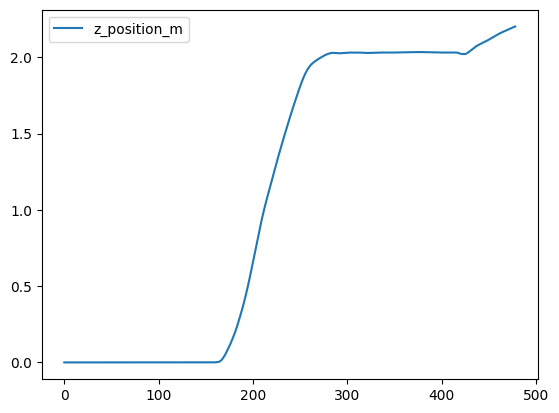

In [28]:
# And let's plot it

# YOUR CODE HERE
df.plot(y="z_position_m")

In [29]:
# What is the final height? How would you find it?

# We can average the ending value (similar to how we did the baseline)
max_height=df["z_position_m"].max()
max_height

2.2022289150558416

In [30]:
# YOUR CODE HERE
ave_max=df["z_position_m"].iloc[225:350].mean()
ave_max                               

1.9162220905791758

In [31]:
# Ok, now you try it!

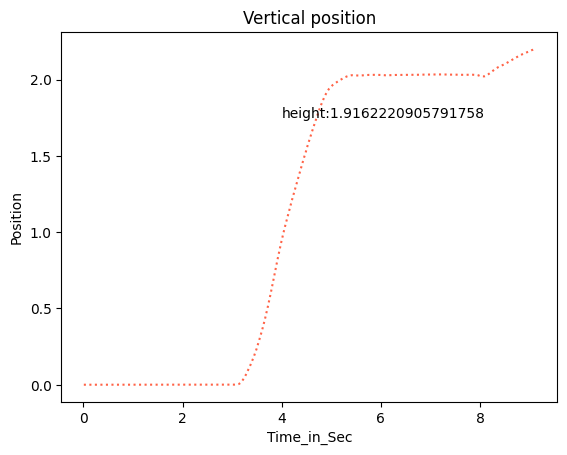

In [32]:
plt.plot(df.time,df.z_position_m, color='tomato',linestyle=':')
plt.xlabel('Time_in_Sec')
plt.ylabel('Position')
plt.title('Vertical position')
plt.text(4,1.75,'height:'+str(ave_max))
plt.show()


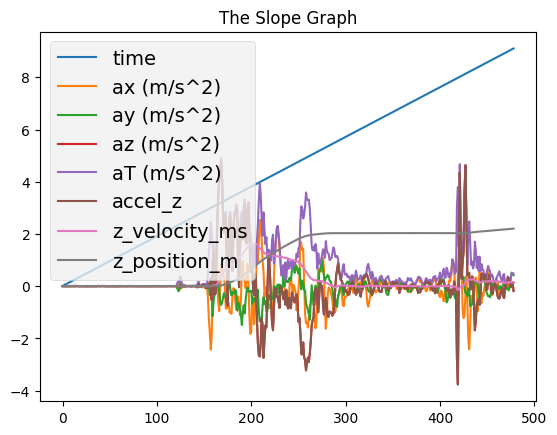

In [33]:
# Challenge 1: Using what you learned in Datacamp, make your plots easier to read

# Remember, we can use plt.plot() and plt.show()
# which is slightly different syntax that what we did above

# Add a title
# Add an annotation for the final height
# Change the line color and line style
df.plot(title='The Slope Graph')
#plt.plot( df.z_velocity_ms, label="Velocity")
#plt.plot( df.z_position_m, label="Position")
#plt.plot( df.accel_z, label="Acceleration")

plt.style.use("fivethirtyeight")
plt.legend()
plt.show()


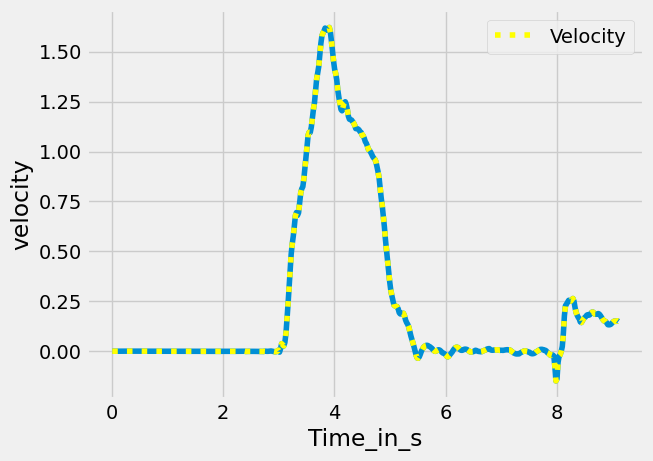

In [34]:
plt.plot(df['time'],df['z_velocity_ms'])
plt.xlabel('Time_in_s')
plt.ylabel('velocity')
plt.plot(df.time, df.z_velocity_ms,
         label="Velocity", linestyle=':', color='yellow')
plt.legend()
plt.show()


In [35]:
# Challenge 2: Measure the height of different objects in the room


In [36]:
# Challenge 2b: Measure the height of an object in the room, but this time using either
# the g-force meter (Physics Toolbox) or Acceleration with g (PhyPhox)
# How is it different?

In [37]:
# Challenge 3: Look at the other axes (x and y) -- what is going on with them?

# Ploting the x, y, and z displacements on one plot

In [38]:
# Challenge 4a: With your group, start working on the group project

# Measure the height of one of your teammates with *all* group members' phones

In [39]:
# Challenge 4b: With your group start discussing what *other* sensor you will use
# Or what *other* experiment you can do with the linear accelerometer